#### **ETL (Exploración, Transformación y Carga de Datos)**
1. **Se inicializa el proceso con la importacion del archivo "Internet.xlsx" el cual tiene la estructura de lista de diccionarios por ser un archivo con multiples hojas con sus campos cada una. Luego imprimimos una muestra de las 5 primeras filas de cada hoja para identificar su contenido y campos**

In [1]:
import pandas as pd
from functions import opciones_impresion, renombrar_campos, opciones_impresion, validar_df
opciones_impresion() # Invocar la función para mejorar la impresion y que no se recorte la información al imprimir.

# Carga las hojas sin cargar datos, solo los nombres
df_internet = pd.read_excel('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_csv/raw/Internet.xlsx', sheet_name=None)
excel_data = pd.ExcelFile('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data_csv/raw/Internet.xlsx')

# Validamos las primeras lineas de cada hoja para identifica su contenido
for hojas in df_internet:
    print(f'La hoja {hojas} contiene:') # Imprime el nombre de la hoja
    print(df_internet[hojas].head(5))
    print('\n')
# Validamos la dimensionalidad y los campos de cada hoja, su tipo y conteo de los mismo para tener claro el panorama**
for hojas in df_internet:
    print(f'La hoja {hojas} tiene un tamaño de {df_internet[hojas].shape} y contiene los campos:')
    print(validar_df(df_internet[hojas]))
    print('\n')

La hoja Acc_vel_loc_sinrangos contiene:
  Partido       Localidad   link Indec  Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo  6854100          0.00         1.0  
1  BUENOS AIRES  25 de Mayo  25 de Mayo  6854100          0.50         2.0  
2  BUENOS AIRES  25 de Mayo  25 de Mayo  6854100          0.75        19.0  
3  BUENOS AIRES  25 de Mayo  25 de Mayo  6854100          3.00        85.0  
4  BUENOS AIRES  25 de Mayo  25 de Mayo  6854100          3.50       145.0  


La hoja Velocidad_sin_Rangos contiene:
   Año   Trimestre Provincia      Velocidad  Accesos
0  2024  2          BUENOS AIRES   75.0       1062  
1  2024  2          BUENOS AIRES   59.0         59  
2  2024  2          BUENOS AIRES  480.0          5  
3  2024  2          BUENOS AIRES    3.5      41735  
4  2024  2          BUENOS AIRES   18.0       1042  


La hoja Accesos_tecnologia_localidad contiene:
  Provincia     Partido     Localidad   Tecnologia    Link Indec  Accesos
0  BUENOS AIRES 

La impresion de las muestras de cada hoja con sus tipos de datos, cantidades y dimensiones nos permite identificar varias cosas que requieren ajustes:

- Se identifica los nombres de varios campos pueden ser mas intuitivos segun el nombre de la hoja que les contiene:

In [2]:
# Definimos las modificaciones que haremos a los nombres de los campos en cada hoja para que sean mas intuitivos:
nuevos_nombres_nivel_nacional = {   "Totales VMD":                      {"Mbps (Media de bajada)": "Tot_Vel_Media_DL"},
                                    "Totales Accesos Por Tecnología":   {"ADSL": "Tot_Acc_ADSL",
                                                                         "Cablemodem": "Tot_Acc_CaModem",
                                                                         "Fibra óptica": "Tot_Acc_FO",
                                                                         "Wireless": "Tot_Acc_Wireless",
                                                                         "Otros": "Tot_Acc_Otros"},
                                    "Penetracion-totales":              {"Accesos por cada 100 hogares": "Tot_pntrcion_x_c100_Hoga",
                                                                         "Accesos por cada 100 hab": "Tot_pntrcion_x_c100_Habi"},
                                    "Totales Accesos por rango":        {"Hasta 512 kbps": "Tot_Acc_rango_0_512_kbps",
                                                                         "Entre 512 Kbps y 1 Mbps": "Tot_Acc_rango_0.512->1_Mbps",
                                                                         "Entre 1 Mbps y 6 Mbps": "Tot_Acc_rango_1->6_Mbps",
                                                                         "Entre 6 Mbps y 10 Mbps": "Tot_Acc_rango_6->10_Mbps",
                                                                         "Entre 10 Mbps y 20 Mbps": "Tot_Acc_rango_10->20_Mbps",
                                                                         "Entre 20 Mbps y 30 Mbps": "Tot_Acc_rango_20->30_Mbps",
                                                                         "Más de 30 Mbps": "Tot_Acc_rango_>30_Mbps",
                                                                         "OTROS": "Tot_Acc_rango_Otros",
                                                                         "Total": "Tot_Acc_rango"},
                                    "Totales Dial-BAf":                 {"Banda ancha fija": "Tot_B_Ancha_Fija",
                                                                         "Dial up": "Tot_DialUp",
                                                                         "Total": "Tot_DialUp_+_B_Ancha_Fija"},
                                                                         "Ingresos ": {"Ingresos": "Total_Ingresos"}
                                }
# Lista de nombres actuales y sus renombramientos para los campos de nivel nacional:
nuevos_nombres_nivel_provincias =   { "Velocidad % por prov":     {"Mbps (Media de bajada)": "Tot_Vel_Media_DL_Trim_x_Prov"},
                                    "Accesos Por Tecnología":   {"ADSL": "Tot_Acc_ADSL_x_Prov",
                                                                 "Cablemodem": "Tot_Acc_CaModem_x_Prov",
                                                                 "Fibra óptica": "Tot_Acc_FO_x_Prov",
                                                                 "Wireless": "Tot_Acc_Wireless_x_Prov",
                                                                 "Otros": "Tot_Acc_Otros_x_Prov",
                                                                 "Total": "Tot_Acc_x_Prov"},
                                    "Penetración-poblacion":    {"Accesos por cada 100 hab": "Tot_pntrcion_x_c100_Habi_x_Prov"},
                                    "Penetracion-hogares":      {"Accesos por cada 100 hogares": "Tot_pntrcion_x_c100_Hoga_x_Prov"},
                                    "Accesos por rangos":       {"HASTA 512 kbps": "Tot_Acc_rango_0->512_kbps_x_Prov",
                                                                 "+ 512 Kbps - 1 Mbps": "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
                                                                 "+ 1 Mbps - 6 Mbps": "Tot_Acc_rango_1->6_Mbps_x_Prov",
                                                                 "+ 6 Mbps - 10 Mbps": "Tot_Acc_rango_6->10_Mbps_x_Prov",
                                                                 "+ 10 Mbps - 20 Mbps": "Tot_Acc_rango_10->20_Mbps_x_Prov",
                                                                 "+ 20 Mbps - 30 Mbps": "Tot_Acc_rango_20->30_Mbps_x_Prov",
                                                                 "+ 30 Mbps": "Tot_Acc_rango_>30_Mbps_x_Prov",
                                                                 "OTROS": "Tot_Acc_rango_Otros_Mbps_x_Prov",
                                                                 "Total": "Tot_Acc_rango_Mbps_x_Prov"},
                                                                 "Dial-BAf": {"Banda ancha fija": "Tot_B_Ancha_Fija_x_Prov",
                                                                 "Dial up": "Tot_DialUp_x_Prov",
                                                                 "Total": "Tot_DialUp_+_B_Ancha_Fija_x_Prov"}
                                    }
# Renombramos los campos de las hojas con data de nivel Nacional.
df_internet = renombrar_campos(df_internet, nuevos_nombres_nivel_nacional)
# Renombramos los campos de las hojas con data de nivel Provincia.
df_internet = renombrar_campos(df_internet, nuevos_nombres_nivel_provincias)

Validamos el campo "Provincia" en que hojas existe:

In [3]:
from functions import obtener_hojas_validas
hojas_a_excluir = [] # Lista de hojas a excluir para la funcion obtener_hojas_validas
campos_prov = ["Provincia"] # Campo a validar es "provincia"
hojas_prov = obtener_hojas_validas(campos_prov, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen el campo Provincia:\n".format(len(hojas_prov)),hojas_prov, "\n")

Se encontraron 9 hojas que contienen el campo Provincia:
 [('Acc_vel_loc_sinrangos', (18864, 6)), ('Velocidad_sin_Rangos', (18884, 5)), ('Accesos_tecnologia_localidad', (7753, 6)), ('Velocidad % por prov', (1008, 4)), ('Accesos Por Tecnología', (1009, 9)), ('Penetración-poblacion', (1000, 4)), ('Penetracion-hogares', (1000, 4)), ('Accesos por rangos', (1000, 12)), ('Dial-BAf', (1992, 6))] 



- Se identifica en la hoja "Acc_vel_loc_sinrangos" hay un campo denominado "Provincia" el cual contiene datos numericos continuos y un campo denominado "Partido" que contiene datos Categoricos Nominales con los nobres de las Provincias.

In [4]:
# Cambiamos los nombres de los campos en cuestión para normalizar el campo provincia respecto a las demas hojas que lo contienen:
df_internet["Acc_vel_loc_sinrangos"] = df_internet["Acc_vel_loc_sinrangos"].rename(columns={"Provincia": "Provincia_Num"})
df_internet["Acc_vel_loc_sinrangos"] = df_internet["Acc_vel_loc_sinrangos"].rename(columns={"Partido": "Provincia"})

- Se identifica en la hoja "Velocidad_sin_Rangos" en el campo "Provincia" existen datos textuales en mayuscula y minuscula y redundancia en el nombre de provincia "CABA" o "Caba" respecto a "Capital Federal" por lo cual se homogeniza a "Capital Federal" ya que obedecen a la misma región:

In [5]:
from functions import reemplazar_valor_en_hojas
# Para cambiar en todas las hojas la palabra "caba" (en cualquier combinación de mayúsculas y minusculas) por "Capital Federal"
df_internet = reemplazar_valor_en_hojas(df_internet, "Provincia", ("caba", "Capital Federal"))

Se reemplazan valores en la hoja 'Acc_vel_loc_sinrangos'.
Se reemplazan valores en la hoja 'Velocidad_sin_Rangos'.
Se reemplazan valores en la hoja 'Accesos_tecnologia_localidad'.
Se reemplazan valores en la hoja 'Velocidad % por prov'.
Se reemplazan valores en la hoja 'Accesos Por Tecnología'.
Se reemplazan valores en la hoja 'Penetración-poblacion'.
Se reemplazan valores en la hoja 'Penetracion-hogares'.
Se reemplazan valores en la hoja 'Accesos por rangos'.
Se reemplazan valores en la hoja 'Dial-BAf'.


Validamos en las hojas que contienen el campo "Provincia" la ocurrencia de sus datos y variaciones de los mismos:

In [6]:
from functions import datos_unicos_hoja
datos = datos_unicos_hoja(("Acc_vel_loc_sinrangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos_tecnologia_localidad", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetración-poblacion", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Provincia":1})

En la hoja 'Acc_vel_loc_sinrangos', el campo Provincia tiene 24 valores únicos y son:
{'BUENOS AIRES': 7172, 'CORDOBA': 2211, 'SANTA FE': 1892, 'ENTRE RIOS': 747, 'MENDOZA': 706, 'SALTA': 612, 'RIO NEGRO': 510, 'SANTIAGO DEL ESTERO': 500, 'LA PAMPA': 474, 'MISIONES': 403, 'CHACO': 398, 'TUCUMAN': 377, 'NEUQUEN': 342, 'CORRIENTES': 325, 'SAN JUAN': 311, 'CHUBUT': 304, 'FORMOSA': 302, 'JUJUY': 300, 'SAN LUIS': 247, 'LA RIOJA': 239, 'CATAMARCA': 217, 'SANTA CRUZ': 154, 'TIERRA DEL FUEGO': 66, 'Capital Federal': 55}

En la hoja 'Velocidad_sin_Rangos', el campo Provincia tiene 47 valores únicos y son:
{'Buenos Aires': 1650, 'Capital Federal': 1316, 'Córdoba': 1229, 'Santa Fe': 1069, 'Mendoza': 796, 'Río Negro': 778, 'La Pampa': 776, 'Misiones': 747, 'Entre Ríos': 730, 'Tucumán': 696, 'Chaco': 692, 'Neuquén': 676, 'Chubut': 645, 'Salta': 638, 'Santa Cruz': 627, 'Jujuy': 618, 'Corrientes': 615, 'Tierra Del Fuego': 596, 'Santiago Del Estero': 577, 'Formosa': 571, 'San Juan': 548, 'San Luis': 5

Identificamos la necesidad de estandarizar los textos eliminando variaciones asociadas a tildes, espacios, mayusculas, minusculas y hacemos casting a tipo Category en los campos:
- "Localidad" de la hoja "Acc_vel_loc_sinrangos".
- 
- "Provincia" de las hojas "Acc_vel_loc_sinrangos","Velocidad_sin_Rangos","Accesos_tecnologia_localidad","Velocidad % por prov","Accesos Por Tecnología","Penetración-poblacion","Penetracion-hogares","Accesos por rangos" y "Dial-BAf".
- "Partido", "Localidad" y "Tecnologia" de la hoja "Accesos_tecnologia_localidad".

In [32]:
# Hacemos una normalización o estandarización de todos los datos del campo "Provincia" en todas las hojas que lo contienen:
# Utilizamos la funcion "normalizar_texto" para eliminar acentos y otros signos diacríticos de una cadena.
from functions import normalizar_y_categorizar_campo

# Para los campos "Provincia":
hojas = [   "Acc_vel_loc_sinrangos",
            "Velocidad_sin_Rangos",
            "Accesos_tecnologia_localidad",
            "Velocidad % por prov",
            "Accesos Por Tecnología",
            "Penetración-poblacion",
            "Penetracion-hogares",
            "Accesos por rangos",
            "Dial-BAf"
        ]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Provincia")

# Para el campo "link Indec":
hojas = ["Acc_vel_loc_sinrangos"]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "link Indec")

# Para la hoja "Accesos_tecnologia_localidad":
hojas = ["Accesos_tecnologia_localidad"]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Partido")
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Localidad")
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Tecnologia")

# Para la hoja "Acc_vel_loc_sinrangos":
hojas = ["Acc_vel_loc_sinrangos"]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Localidad")

# Para la hoja "Accesos Por Tecnología":
hojas = ["Accesos Por Tecnología"]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Provincia")

# Para las hojas "Totales Accesos Por Tecnología", "Penetracion-totales", "Totales Dial-BAf", "Ingresos "
hojas = ["Totales Accesos Por Tecnología", "Penetracion-totales", "Totales Dial-BAf", "Ingresos "]
df_internet = normalizar_y_categorizar_campo(df_internet, hojas, "Periodo")

Categorías globales para 'Provincia': ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']
Cantidad de categorías únicas: 24
Categorías globales para 'link Indec': ['11 De Octubre', '11 De Septiembre', '12 De Octubre', '1O De Mayo', '20 De Junio', '25 De Mayo', '28 De Julio', '28 De Noviembre', '3 De Mayo', '30 De Agosto', '7 De Abril', '9 De Abril', '9 De Julio', 'Aaron Castellanos (Est. Castellanos)', 'Abasto', 'Abbott', 'Abra Grande', 'Abra Pampa', 'Abramo', 'Acassuso', 'Acceso Norte', 'Acebal', 'Acevedo', 'Acheral', 'Achiras', 'Aconquija', 'Acoyte', 'Adelia Maria', 'Adolfo Gonzales Chaves  (Est. Chaves)', 'Adolfo Van Praet', 'Adrogue', 'Aerolito', 'Aeropuerto Internacional Ezeiza', 'Agrelo', 'Agua De Oro', 'Aguada Cecilio', 'Agu

- Validamos el valor Nulo del campo "link Indec" en la hoja "Acc_vel_loc_sinrangos" y por su baja cantidad se imputa a la media:

In [38]:
# Validamos el valor Nulo del campo "link Indec" en la hoja "Acc_vel_loc_sinrangos" y por su baja cantidad se imputa a la media:
print("Datos nulos en la hoja Acc_vel_loc_sinrangos en el campo link Indec:",df_internet["Acc_vel_loc_sinrangos"]["link Indec"].isnull().sum(), "de", df_internet["Acc_vel_loc_sinrangos"]["link Indec"].shape[0])
print(df_internet["Acc_vel_loc_sinrangos"][df_internet["Acc_vel_loc_sinrangos"]["link Indec"].isnull()])
df_internet["Acc_vel_loc_sinrangos"]["link Indec"].fillna(df_internet["Acc_vel_loc_sinrangos"]["link Indec"].mode()[0], inplace=True)
print("Datos nulos en el hoja Acc_vel_loc_sinrangos en el campo link Indec luego de la imputación:",df_internet["Acc_vel_loc_sinrangos"]["link Indec"].isnull().sum(), "de", df_internet["Acc_vel_loc_sinrangos"]["link Indec"].shape[0])

Datos nulos en la hoja Acc_vel_loc_sinrangos en el campo link Indec: 0 de 18864
Empty DataFrame
Columns: [Provincia, Localidad, link Indec, Velocidad (Mbps), Provincia_Num, Accesos]
Index: []
Datos nulos en el hoja Acc_vel_loc_sinrangos en el campo link Indec luego de la imputación: 0 de 18864


/var/folders/78/5lwff5710n349fmq7y5ycwgc0000gn/T/ipykernel_41044/544256125.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_internet["Acc_vel_loc_sinrangos"]["link Indec"].fillna(df_internet["Acc_vel_loc_sinrangos"]["link Indec"].mode()[0], inplace=True)


Revalidamos en el campo "Provincia" la ocurrencia de sus datos y variaciones a los mismos a ver si ya se ven homogenios luego de la categorización:

In [8]:
from functions import datos_unicos_hoja
datos = datos_unicos_hoja(("Acc_vel_loc_sinrangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos_tecnologia_localidad", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetración-poblacion", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Provincia":1})

En la hoja 'Acc_vel_loc_sinrangos', el campo Provincia tiene 24 valores únicos y son:
{'Buenos Aires': 7172, 'Cordoba': 2211, 'Santa Fe': 1892, 'Entre Rios': 747, 'Mendoza': 706, 'Salta': 612, 'Rio Negro': 510, 'Santiago Del Estero': 500, 'La Pampa': 474, 'Misiones': 403, 'Chaco': 398, 'Tucuman': 377, 'Neuquen': 342, 'Corrientes': 325, 'San Juan': 311, 'Chubut': 304, 'Formosa': 302, 'Jujuy': 300, 'San Luis': 247, 'La Rioja': 239, 'Catamarca': 217, 'Santa Cruz': 154, 'Tierra Del Fuego': 66, 'Capital Federal': 55}

En la hoja 'Velocidad_sin_Rangos', el campo Provincia tiene 24 valores únicos y son:
{'Buenos Aires': 1730, 'Capital Federal': 1316, 'Cordoba': 1292, 'Santa Fe': 1122, 'Mendoza': 833, 'Rio Negro': 820, 'La Pampa': 810, 'Misiones': 780, 'Entre Rios': 760, 'Tucuman': 731, 'Chaco': 721, 'Neuquen': 707, 'Chubut': 685, 'Salta': 673, 'Santa Cruz': 658, 'Jujuy': 647, 'Corrientes': 644, 'Tierra Del Fuego': 628, 'Santiago Del Estero': 605, 'Formosa': 596, 'San Juan': 577, 'San Luis': 5

- Ahora ajustamos los tipos de datos de los campos "Año" y "Trimestre" de la hoja "Accesos Por Tecnología" a tipo "Int":

In [21]:
# Hacemos casting a los datos de los campos "Año" y "Trimestre" de la hoja "Accesos Por Tecnología" a tipo "Int":
from functions import normalizar_y_cast_numero
hojas = ["Accesos Por Tecnología"]
campos = ["Año", "Trimestre"]
df_internet = normalizar_y_cast_numero(df_internet, hojas, campos)

- Eliminamos datos nulos presentes en la hoja "Accesos Por Tecnología" (obedece a dos filas sin datos por una notacion que traía el archivo):

In [24]:
# - Eliminamos datos nulos presentes en la hoja "Accesos Por Tecnología" (obedece a dos filas sin datos por una notacion que traía el archivo):
df_internet["Accesos Por Tecnología"] = df_internet["Accesos Por Tecnología"].dropna()

- Volvemos positivos dos datos del campo "Tot_Acc_rango_Otros_Mbps_x_Prov" en la hoja "Accesos por rangos" que aparecen con un signo negativo o guion:

In [25]:
# Volvemos positivos dos datos del campo "Tot_Acc_rango_Otros_Mbps_x_Prov" en la hoja "Accesos por rangos" que aparecen con un signo negativo o guion:
df_internet["Accesos por rangos"]["Tot_Acc_rango_Otros_Mbps_x_Prov"] = df_internet["Accesos por rangos"]["Tot_Acc_rango_Otros_Mbps_x_Prov"].abs()

- Validamos los datos nulos del campo "Tot_DialUp_x_Prov" en la hoja "Dial-BAf":

In [ ]:
# Validamos y contamos los datos nulos del campo "Tot_DialUp_x_Prov" en la hoja "Dial-BAf":
print("Datos nulos en la hoja Dial-BAf en el campo Tot_DialUp_x_Prov:",df_internet["Dial-BAf"]["Tot_DialUp_x_Prov"].isnull().sum(), "de", df_internet["Dial-BAf"]["Tot_DialUp_x_Prov"].shape[0])
print(df_internet["Dial-BAf"][df_internet["Dial-BAf"]["Tot_DialUp_x_Prov"].isnull()])

Datos nulos en la hoja Dial-BAf en el campo Tot_DialUp_x_Prov: 4 de 1992
      Año   Trimestre Provincia  Tot_B_Ancha_Fija_x_Prov  Tot_DialUp_x_Prov  Tot_DialUp_+_B_Ancha_Fija_x_Prov
584   2018  2           Formosa   44554                  NaN                  44554                          
589   2018  2          Misiones  106147                  NaN                 106147                          
1568  2018  2           Formosa   44554                  NaN                  44554                          
1573  2018  2          Misiones  106147                  NaN                 106147                          


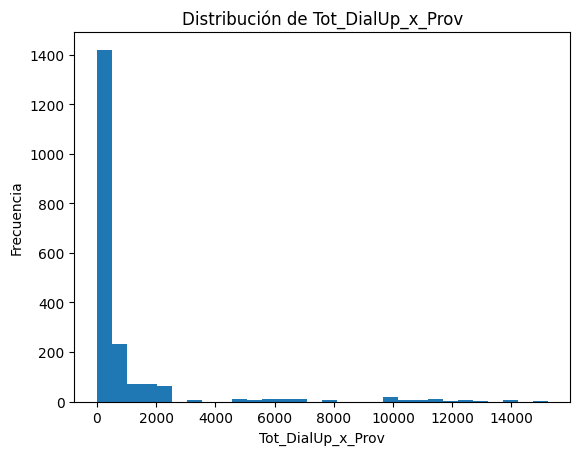

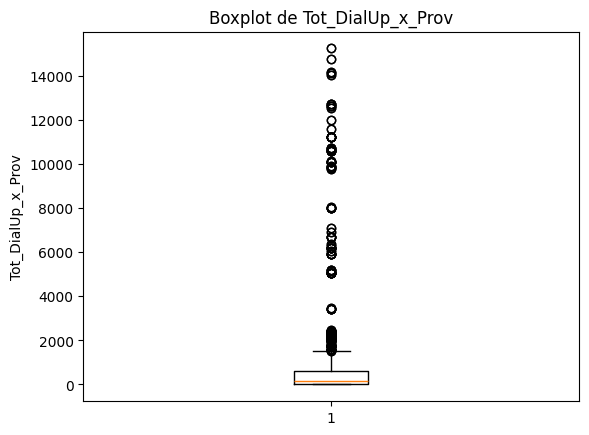

In [ ]:
# Al ser solo 4 datos de 1992 entonces s emantienen en Nulo lo cual no afectará el análisis.57
import matplotlib.pyplot as plt

# Suponiendo que df_internet["Dial-BAf"] es tu DataFrame para la hoja Dial-BAf:
df_dial_baf = df_internet["Dial-BAf"]

# Seleccionar la columna y eliminar los NaN (o reemplazarlos si prefieres)
data = df_dial_baf["Tot_DialUp_x_Prov"].dropna()

# Histograma
plt.figure()
plt.hist(data, bins=30)
plt.title("Distribución de Tot_DialUp_x_Prov")
plt.xlabel("Tot_DialUp_x_Prov")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot para ver la dispersión y detectar outliers
plt.figure()
plt.boxplot(data)
plt.title("Boxplot de Tot_DialUp_x_Prov")
plt.ylabel("Tot_DialUp_x_Prov")
plt.show()

- En el caso de la hoja "Acc_vel_loc_sinrangos" hay presencia de 1 de 18863 dato Nulo en campo "link Indec" y 7 nulos de 18857 en "Accesos", tambien hay 138 de 18726 tipo Objetc Vs. 138 tipo Int, por las cantidades no se imputaran a cero dichos valores y se mantendran como nulos. Si se imputaran a la media los 7 valores nulos del campo "Accesos":

In [28]:
# Se imputan al valor de la media los 7 valores nulos del campo "Accesos" de la hoja "Acc_vel_loc_sinrangos":
df_internet["Acc_vel_loc_sinrangos"]["Accesos"] = df_internet["Acc_vel_loc_sinrangos"]["Accesos"].fillna(df_internet["Acc_vel_loc_sinrangos"]["Accesos"].mean())

In [34]:
# Validamos la dimensionalidad y los campos de cada hoja, su tipo y conteo de los mismo para tener claro el panorama y pasar al EDA:
for hojas in df_internet:
    print(f'La hoja {hojas} tiene un tamaño de {df_internet[hojas].shape} y contiene los campos:')
    print(validar_df(df_internet[hojas]))
    print('\n')

La hoja Acc_vel_loc_sinrangos tiene un tamaño de (18864, 6) y contiene los campos:
                 Tipo de Dato Int    Int64 Float  Bool DateT Str    Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string) Media       Desviación_Std Mínimo  Q1_25% Q2_50% Q3_75%  Máximo    Negativos
Provincia         category         0  0         0  0    0     18864  18864  18864    0       24   NaN     0                    NaN          NaN       NaN  NaN     NaN      NaN       NaN  NaN     
Localidad         category         0  0         0  0    0     18864  18864  18864    0      432   NaN     0                    NaN          NaN       NaN  NaN     NaN      NaN       NaN  NaN     
link Indec        category         0  0         0  0    0     18863  18863  18863    1     2774   NaN     0                    NaN          NaN       NaN  NaN     NaN      NaN       NaN  NaN     
Velocidad (Mbps)    object     18726  0         0  0    0       138    NaN  18864    0     2665   NaN   NaN                    NaN   

In [5]:
from functions import reemplazar_valor_en_hojas
# Para cambiar en todas las hojas la palabra "caba" (en cualquier combinación de mayúsculas y minusculas) por "Capital Federal"
df_internet = reemplazar_valor_en_hojas(df_internet, "Provincia", ("caba", "Capital Federal"))

En la hoja 'Totales VMD', el campo 'Provincia' no se encuentra.
En la hoja 'Totales Accesos Por Tecnología', el campo 'Provincia' no se encuentra.
En la hoja 'Penetracion-totales', el campo 'Provincia' no se encuentra.
En la hoja 'Totales Accesos por rango', el campo 'Provincia' no se encuentra.
En la hoja 'Totales Dial-BAf', el campo 'Provincia' no se encuentra.
En la hoja 'Ingresos ', el campo 'Provincia' no se encuentra.


Ahora revalidamos la cantidad de veces que se encuentra el texto "caba" en los campos "Provincia" de cada hoja:

In [6]:
for hoja in df_internet:
    if "Provincia" in df_internet[hoja].columns:
        count_exact = df_internet[hoja]["Provincia"].str.contains(r'^Caba$', case=False, regex=True).sum()
        print(f"En la hoja {hoja} se encontraron {count_exact} registros exactamente iguales a 'caba' (ignorando mayúsculas).")

En la hoja Acc_vel_loc_sinrangos se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Velocidad_sin_Rangos se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Accesos_tecnologia_localidad se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Velocidad % por prov se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Accesos Por Tecnología se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Penetración-poblacion se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Penetracion-hogares se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Accesos por rangos se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúsculas).
En la hoja Dial-BAf se encontraron 0 registros exactamente iguales a 'caba' (ignorando mayúscul

Luego como buena practica hacemos una Homogenizacion del estilo y del tipo de dato a Categorico:

In [ ]:
'''# Ahora hacemos una normalización o estandarización de todos los datos del campo "Provincia" en todas las hojas que lo contienen:
# Utilizamos la funcion "normalizar_texto" para eliminar acentos y otros signos diacríticos de una cadena.
from functions import normalizar_texto

hojas = [
    df_internet["Acc_vel_loc_sinrangos"],
    df_internet["Velocidad_sin_Rangos"],
    df_internet["Accesos_tecnologia_localidad"],
    df_internet["Velocidad % por prov"],
    df_internet["Accesos Por Tecnología"],
    df_internet["Penetración-poblacion"],
    df_internet["Penetracion-hogares"],
    df_internet["Accesos por rangos"],
    df_internet["Dial-BAf"]
]

categorias_global = set() # Conjunto para almacenar las categorías únicas destinadas al cambio de tipo de dato a category
for df in hojas:
    if "Provincia" in df.columns:
        # Convertimos a string, quitamos espacios, eliminamos acentos, pasamos a estilo title y categorizamos:
        series_norm = df["Provincia"].astype(str).str.strip().apply(normalizar_texto).str.title() # Normalizamos los datos
        categorias_global.update(series_norm.unique()) # Agregamos las categorías únicas a un conjunto

# Suponiendo que en 'categorias_global' haya quedado algun NaN entonces se elimina:
categorias_global = {cat for cat in categorias_global if cat.lower() != 'nan'}

# Convertir a lista ordenada
categorias_global = sorted(categorias_global)
print("Categorías globales:", categorias_global)
# Validamos la cantidad de categorias unicas:
print("Cantidad de categorias unicas:", len(categorias_global))

Categorías globales: ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']
Cantidad de categorias unicas: 24


Ahora nos concentramos en los campos "Año" y "Trimestre" a los cuales les hacemos una homogenización igualmente para que su tipo de dato sea int64 en todas las hojas donde sichos campos existan:

In [8]:
hojas_a_excluir = [] # Lista vacia de hojas a excluir
campos_ano = ["Año"] # El campo a validar es "Año"
hojas_ano = obtener_hojas_validas(campos_ano, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen el campo Año :\n".format(len(hojas_ano)), hojas_ano, "\n")

campos_trim = ["Trimestre"] # El campo a validar es "Trimestre"
hojas_trim = obtener_hojas_validas(campos_trim, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen el campo Trimestre :\n".format(len(hojas_trim)), hojas_trim, "\n")

Se encontraron 13 hojas que contienen el campo Año :
 [('Velocidad_sin_Rangos', (18884, 5)), ('Velocidad % por prov', (1008, 4)), ('Totales VMD', (42, 4)), ('Totales Accesos Por Tecnología', (42, 9)), ('Accesos Por Tecnología', (1009, 9)), ('Penetración-poblacion', (1000, 4)), ('Penetracion-hogares', (1000, 4)), ('Penetracion-totales', (42, 5)), ('Totales Accesos por rango', (42, 11)), ('Accesos por rangos', (1000, 12)), ('Dial-BAf', (1992, 6)), ('Totales Dial-BAf', (42, 6)), ('Ingresos ', (42, 4))] 

Se encontraron 13 hojas que contienen el campo Trimestre :
 [('Velocidad_sin_Rangos', (18884, 5)), ('Velocidad % por prov', (1008, 4)), ('Totales VMD', (42, 4)), ('Totales Accesos Por Tecnología', (42, 9)), ('Accesos Por Tecnología', (1009, 9)), ('Penetración-poblacion', (1000, 4)), ('Penetracion-hogares', (1000, 4)), ('Penetracion-totales', (42, 5)), ('Totales Accesos por rango', (42, 11)), ('Accesos por rangos', (1000, 12)), ('Dial-BAf', (1992, 6)), ('Totales Dial-BAf', (42, 6)), ('Ingr

Usamos espresiones regulares para ajustar los campos tipo String que contienen los años del campos Años en la hoja Accesos Por Tecnología

In [9]:


# Validamos la dimensionalidad y los campos de cada hoja, su tipo y conteo de los mismo para tener claro el panorama**
for hojas in df_internet:
    print(f'La hoja {hojas} tiene un tamaño de {df_internet[hojas].shape} y contiene los campos:')
    print(validar_df(df_internet[hojas]))
    print('\n')

La hoja Acc_vel_loc_sinrangos tiene un tamaño de (18864, 6) y contiene los campos:
                 Tipo de Dato    Int Int64  Float Bool DateT    Str Ctgory No_Nulos Nulos Únicos Ceros Vacíos (string)       Media Desviación_Std  Mínimo Q1_25% Q2_50% Q3_75%    Máximo Negativos
Provincia              object      0     0      0    0     0  18864    NaN    18864     0     24   NaN               0         NaN            NaN     NaN    NaN    NaN    NaN       NaN       NaN
Localidad              object      0     0      0    0     0  18864    NaN    18864     0    435   NaN               0         NaN            NaN     NaN    NaN    NaN    NaN       NaN       NaN
link Indec             object      0     0      0    0     0  18863    NaN    18863     1   2782   NaN             NaN         NaN            NaN     NaN    NaN    NaN    NaN       NaN       NaN
Velocidad (Mbps)       object  18726     0      0    0     0    138    NaN    18864     0   2665   NaN             NaN         NaN       

In [12]:
from functions import datos_unicos_hoja
datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Año":1, "Trimestre":1, "Provincia":1})

En la hoja 'Velocidad_sin_Rangos', el campo Año tiene 8 valores únicos y son:
{2023: 3457, 2022: 3227, 2021: 3041, 2020: 2686, 2019: 2306, 2018: 1982, 2024: 1738, 2017: 447}

En la hoja 'Velocidad_sin_Rangos', el campo Trimestre tiene 4 valores únicos y son:
{2: 4970, 1: 4843, 4: 4792, 3: 4279}

En la hoja 'Velocidad_sin_Rangos', el campo Provincia tiene 47 valores únicos y son:
{'Buenos Aires': 1650, 'Capital Federal': 1316, 'Córdoba': 1229, 'Santa Fe': 1069, 'Mendoza': 796, 'Río Negro': 778, 'La Pampa': 776, 'Misiones': 747, 'Entre Ríos': 730, 'Tucumán': 696, 'Chaco': 692, 'Neuquén': 676, 'Chubut': 645, 'Salta': 638, 'Santa Cruz': 627, 'Jujuy': 618, 'Corrientes': 615, 'Tierra Del Fuego': 596, 'Santiago Del Estero': 577, 'Formosa': 571, 'San Juan': 548, 'San Luis': 531, 'Catamarca': 493, 'La Rioja': 449, 'BUENOS AIRES': 80, 'CORDOBA': 63, 'SANTA FE': 53, 'RIO NEGRO': 42, 'CHUBUT': 40, 'MENDOZA': 37, 'TUCUMAN': 35, 'SALTA': 35, 'LA PAMPA': 34, 'MISIONES': 33, 'TIERRA DEL FUEGO': 32, 'N

In [11]:
import pandas as pd
from functions import generar_diccionario_tipos

print(generar_diccionario_tipos(df_internet, "Accesos_tecnologia_localidad"))
print(generar_diccionario_tipos(df_internet, "Velocidad % por prov"))
print(generar_diccionario_tipos(df_internet, "Accesos Por Tecnología"))
print(generar_diccionario_tipos(df_internet, "Penetración-poblacion"))
print(generar_diccionario_tipos(df_internet, "Penetracion-hogares"))
print(generar_diccionario_tipos(df_internet, "Accesos por rangos"))
print(generar_diccionario_tipos(df_internet, "Dial-BAf"))





diccionario_tipos_Accesos_tecnologia_localidad = {
    "Provincia": str,
    "Partido": str,
    "Localidad": str,
    "Tecnologia": str,
    "Link Indec": str,
    "Accesos": float,
}
diccionario_tipos_Velocidad % por prov = {
    "Año": "Int64",
    "Trimestre": "Int64",
    "Provincia": str,
    "Tot_Vel_Media_DL_Trim_x_Prov": float,
}
diccionario_tipos_Accesos Por Tecnología = {
    "Año": str,
    "Trimestre": str,
    "Provincia": str,
    "Tot_Acc_ADSL_x_Prov": float,
    "Tot_Acc_CaModem_x_Prov": float,
    "Tot_Acc_FO_x_Prov": float,
    "Tot_Acc_Wireless_x_Prov": float,
    "Tot_Acc_Otros_x_Prov": float,
    "Tot_Acc_x_Prov": float,
}
diccionario_tipos_Penetración-poblacion = {
    "Año": "Int64",
    "Trimestre": "Int64",
    "Provincia": str,
    "Tot_pntrcion_x_c100_Habi_x_Prov": float,
}
diccionario_tipos_Penetracion-hogares = {
    "Año": "Int64",
    "Trimestre": "Int64",
    "Provincia": str,
    "Tot_pntrcion_x_c100_Hoga_x_Prov": float,
}
diccionario_tipos_Accesos por

3. **En una primera exploración de las hojas se idetifica hay datos desagregados por año y trimestre a nivel nacional y hay otros con año, trimestre y provincia por lo cual podríamos reducir la cantidad de dataframes agrupando gran parte de la información en dos macro dataframes (df_Internet_Nacional, df_Internet_Provincias).**

In [ ]:







############################################################################################################
#**4. Para cada hoja validamos dimensionalidad e identificamos si se generaria o no perdida de 
# información evaluando el impacto que generaría unificar las hojas con los nuevos campos id.**
# Luego de validar que varias hojas tienen campos comunes entonces los campos Año, Trimestre y Provincia, se procede a unificarlas.
# Seleccionamos las hojas que contienen los campos Año, Trimestre y Provincia
print("#4. Para cada hoja validamos dimensionalidad e identificamos si se generaria o no perdida de información evaluando el impacto que generaría unificar las hojas con los nuevos campos id.")

hojas_a_excluir = [] # Lista de hojas a excluir para la funcion obtener_hojas_validas
campos_ano_trim_prov = ["Año", "Trimestre","Provincia"] # Campos a validar son "Año", "Trimestre" y "Provincia"
hojas_ano_trim_prov = obtener_hojas_validas(campos_ano_trim_prov, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen los campos Año, Trimestre y Provincia:\n".format(len(hojas_ano_trim_prov)), hojas_ano_trim_prov, "\n")
# 
campos_ano_trim = ["Año", "Trimestre"] # Campos a validar son "Año" y "Trimestre"
hojas_ano_trim = obtener_hojas_validas(campos_ano_trim, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen los campos Año y Trimestre solamente:\n".format(len(hojas_ano_trim)), hojas_ano_trim, "\n")


# Extraemos la lista de hojas que contienen los campos Año, Trimestre y Provincia de la tupla obtenida anteriormente
lista_hojas_ano_trim_prov = [nombre for nombre, _ in hojas_ano_trim_prov]
# Se descarta la hoja 'Velocidad_sin_Rangos' por tener una dimension de (18884, 5) a diferencia de las otras hojas que compraten dimensiones similares
lista_hojas_ano_trim_prov = ['Velocidad % por prov', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Accesos por rangos', 'Dial-BAf']
print(lista_hojas_ano_trim_prov)


# Extraemos la lista de hojas que contienen los campos Año y Trimestre solamente de la tupla obtenida anteriormente
lista_hojas_ano_trim = [nombre for nombre, _ in hojas_ano_trim]
print(lista_hojas_ano_trim,"\n")
print("############################################################################################################")
############################################################################################################

# 5. **Validamos la cantidad y los datos unicos contenidos en los campos Año, Trimestre y Provincia de varias hojas, previo a la unificación de las mismas.**
# Vadidamos la cantidad y los datos unicos contenidos en los campos Año, Trimestre y Provincia de varias hojas, previo a la unificación de las mismas.
from functions import datos_unicos_hoja

datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})

datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Año":1, "Trimestre":0, "Provincia":0})
print("############################################################################################################")
############################################################################################################

# Luego de revisar los tipos de datos, sus cantidades y caracteristicas procedemos a concentrarnos en el campo "Provincia"
# Validamos en detalle cantidades y datos unicos asociado al campo "Provincia"
hojas_a_excluir = [] # Lista de hojas a excluir para la funcion obtener_hojas_validas
campos_prov = ["Provincia"] # Campo a validar es "provincia"
hojas_prov = obtener_hojas_validas(campos_prov, df_internet, hojas_a_excluir)
print("Se encontraron {} hojas que contienen el campo Provincia:\n".format(len(hojas_prov)), hojas_prov, "\n")

datos = datos_unicos_hoja(("Acc_vel_loc_sinrangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad_sin_Rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos_tecnologia_localidad", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Velocidad % por prov", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos Por Tecnología", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetración-poblacion", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Penetracion-hogares", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Accesos por rangos", df_internet), {"Provincia":1})
datos = datos_unicos_hoja(("Dial-BAf", df_internet), {"Provincia":1})

# Se detecta en la hoja "Acc_vel_loc_sinrangos" hay un campo denominado "Provincia" el cual contiene datos numericos continuos
# y un campo denominado "Partido" que contiene datos Categoricos Nominales con los nobres de las Provincias.
# Con base en lo anterior se haran cambios en nombres de campos para homogenizar estos campos respecto a las demas hojas
df_internet["Acc_vel_loc_sinrangos"] = df_internet["Acc_vel_loc_sinrangos"].rename(columns={"Provincia": "Provincia_Num"})
df_internet["Acc_vel_loc_sinrangos"] = df_internet["Acc_vel_loc_sinrangos"].rename(columns={"Partido": "Provincia"})



# Ahora revalidamos la cantidad de veces que se encuentra el texto "caba" en los campos "Provincia" de cada hoja:
for hoja in df_internet:
    if "Provincia" in df_internet[hoja].columns:
        count_exact = df_internet[hoja]["Provincia"].str.contains(r'^Caba$', case=False, regex=True).sum()
        print(f"En la hoja {hoja} se encontraron {count_exact} registros exactamente iguales a 'Caba' (ignorando mayúsculas).")



print("############################################################################################################")
############################################################################################################

# Ahora validamos los campos Año y Trimestre para estandarizarlos igualmente:
# 

# 6. **Luego de identificar algunos datos de los campos Año, Trimestre y Provincia deben ser Homogenizados por su escritura o tipo de dato.**
# Se identificaron los siguientes campos que deben ser homogenizados:
# Año: 2019.0 y 2019
# Trimestre: 1.0 y 1
# Provincia: A Coruña y Coruña
# Provincia: Lugo y Lugo
# Provincia: Ourense y Orense
# Provincia: Pontevedra y Pontevedra
# Provincia: Ceuta y Ceuta y Melilla
# Provincia: Melilla y Ceuta y Melilla


1. **Se inicializa el proceso con la importacion del archivo Internet.xlsx el cual tiene la estructura de diccionario por contener varias hojas con multiples campos cada una.
La hoja Acc_vel_loc_sinrangos contiene:
        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0


La hoja Velocidad_sin_Rangos contiene:
    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5


La hoja Accesos_tecnologia_localidad contiene:
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo

In [ ]:
# Se identifica varias hojas tienen en comun los campos "Año" y "Trimestre", y otras hojas "Año", "Trimestre" y "Provincia"
# Usamos espresiones regulares para ajustar los campos tipo String que contienen los años del campos Años en la hoja Accesos Por Tecnología
'''
import pandas as pd

# Como el df_internet es tu diccionario de DataFrames:
df = df_internet["Accesos Por Tecnología"]

# Convertir la columna "Año" a cadena, extraer la primera secuencia de 4 dígitos,
# convertirla a número (usando errors='coerce' para los casos no convertibles)
# y finalmente cambiar el tipo a entero nullable ("Int64")
df["Año"] = pd.to_numeric(df["Año"].astype(str).str.extract(r'(\d{4})')[0],errors='coerce').astype("Int64")
df["Trimestre"] = pd.to_numeric(df["Trimestre"].astype(str).str.extract(r'(\d{1})')[0],errors='coerce').astype("Int64")
df["Provincia"] = df["Provincia"].str.strip().str.title().astype("category")

# Verificar los valores únicos ya convertidos
print(df["Año"].value_counts())
print(validar_df(df))
print(df.info())
'''

In [ ]:
#df_internet["Velocidad_sin_Rangos"]["Provincia"] = df_internet["Velocidad_sin_Rangos"]["Provincia"].replace("Caba", "Capital Federal")
#df_internet["Velocidad_sin_Rangos"]["Provincia"] = df_internet["Velocidad_sin_Rangos"]["Provincia"].replace("CABA", "Capital Federal")

#print(df_internet["Velocidad_sin_Rangos"].head(90))

print("############################################################################################################")




############################################################################################################
Categorías globales: ['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']
Cantidad de categorias unicas: 24


In [ ]:


'''
# Recategorizar cada DataFrame usando estas categorías globales
for i, df in enumerate(hojas):
    if "Provincia" in df.columns:
        df["Provincia"] = df["Provincia"].astype(str).str.strip().apply(normalizar_texto).str.title()
        df["Provincia"] = pd.Categorical(df["Provincia"], categories=categorias_global)
        # Opcional: mostrar códigos para verificar
        print(f"Hoja {i} - Códigos para 'Provincia':")
        print(df["Provincia"].cat.codes.value_counts().sort_index())'''

Categorías globales: ['Buenos Aires', 'Caba', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Entre Rios', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']
Cantidad de categorias unicas: 25


'\n# Recategorizar cada DataFrame usando estas categorías globales\nfor i, df in enumerate(hojas):\n    if "Provincia" in df.columns:\n        df["Provincia"] = df["Provincia"].astype(str).str.strip().apply(normalizar_texto).str.title()\n        df["Provincia"] = pd.Categorical(df["Provincia"], categories=categorias_global)\n        # Opcional: mostrar códigos para verificar\n        print(f"Hoja {i} - Códigos para \'Provincia\':")\n        print(df["Provincia"].cat.codes.value_counts().sort_index())'

In [ ]:
from functions import fusionar_por_campos, opciones_impresion
opciones_impresion()

df_internet_provincia = fusionar_por_campos(["Año","Trimestre","Provincia"],lista_hojas_ano_trim_prov,df_internet)
print(df_internet_provincia.head(10))


In [9]:
# Para verificar duplicados en las columnas "Año", "Trimestre" y "Provincia" en un DataFrame:
duplicados = df_internet["Penetracion-hogares"][df_internet["Penetracion-hogares"].duplicated(subset=["Año", "Trimestre", "Provincia"], keep=False)]
print(duplicados)

Empty DataFrame
Columns: [Año, Trimestre, Provincia, Tot_pntrcion_x_c100_Hoga_x_Prov]
Index: []


In [16]:
from functions import opciones_impresion
print(df_internet_provincia.head(10))

  id_Trimestre_Año   Año Trimestre        Provincia  Tot_Vel_Media_DL_Trim_x_Prov id_Trimestre_Año_dup  Tot_Acc_ADSL_x_Prov  Tot_Acc_CaModem_x_Prov  Tot_Acc_FO_x_Prov  Tot_Acc_Wireless_x_Prov  Tot_Acc_Otros_x_Prov  Tot_Acc_x_Prov id_Trimestre_Año_dup  Tot_pntrcion_x_c100_Habi_x_Prov id_Trimestre_Año_dup  Tot_pntrcion_x_c100_Hoga_x_Prov id_Trimestre_Año_dup  Tot_Acc_rango_0_512_kbps_x_Prov  Tot_Acc_rango_0.512->1_Mbps_x_Prov  Tot_Acc_rango_1->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_->_Mbps_x_Prov  Tot_Acc_rango_Otros_Mbps_x_Prov  Tot_Acc_rango_Mbps_x_Prov i

In [ ]:
# Modifico el nombre de los campos para hacerlos mas intuitivos
#df_internet['Internet'].rename(columns={'Año':'año', 'Trimestre':'trimestre', 'Provincia':'provincia', 'Hogares con acceso a Internet':'hogares

In [34]:
import pandas as pd
from functions import obtener_hojas_validas

campos_ano_trim_prov = ["Año", "Trimestre","Provincia"]
hojas_a_excluir = []

hojas_ano_trim_prov = obtener_hojas_validas(campos_ano_trim_prov, df_internet, hojas_a_excluir)
print("Hojas que contienen los campos año, trimestre y provincia:\n", hojas_ano_trim_prov)
print("\nTotal de hojas encontradas:", len(hojas_ano_trim_prov))

campos_ano_trim = ["Año", "Trimestre"]
hojas_ano_trim = obtener_hojas_validas(campos_ano_trim, df_internet, hojas_ano_trim_prov)
print("Hojas que contienen los campos año y trimestre solamente:\n", hojas_ano_trim)
print("\nTotal de hojas encontradas:", len(hojas_ano_trim))

ImportError: cannot import name 'obtener_hojas_validas' from 'functions' (/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/functions.py)

In [ ]:
import pandas as pd

def fusionar_por_campo(campo_id, lista_hojas, df_dict):
    """
    Fusiona las hojas indicadas en 'lista_hojas' usando el campo único 'campo_id' como llave de unión.
    
    Parámetros:
      - campo_id (str): Nombre del campo único que se utilizará para fusionar (ej. "id_año_trimestre").
      - lista_hojas (list): Lista de nombres de las hojas a fusionar.
      - df_dict (dict): Diccionario con los DataFrames (clave: nombre de la hoja, valor: DataFrame).
      
    Retorna:
      DataFrame: Resultado de la fusión externa de los DataFrames indicados.
    """
    df_fusionado = None
    
    for hoja in lista_hojas:
        if hoja not in df_dict:
            print(f"La hoja '{hoja}' no se encuentra en el diccionario. Se omite.")
            continue
        df = df_dict[hoja]
        if campo_id not in df.columns:
            print(f"La hoja '{hoja}' no contiene el campo '{campo_id}'. Se omite.")
            continue
        
        if df_fusionado is None:
            df_fusionado = df.copy()
        else:
            df_fusionado = pd.merge(df_fusionado, df, on=campo_id, how='outer', suffixes=('', '_dup'))
    
    if df_fusionado is None:
        return pd.DataFrame()
    return df_fusionado

# Ejemplo de uso:
# Supongamos que 'df_internet' es el diccionario obtenido con pd.read_excel(..., sheet_name=None)
# Fusionar hojas usando el campo "id_año_trimestre"
df_resultado = fusionar_por_campo("id_año_trimestre", ["Velocidad_sin_Rangos", "Totales VMD", "Ingresos"], df_internet)

In [ ]:
"""
import pandas as pd

def unificar_hojas(df_dict):
    
    Unifica hojas de un archivo Excel en dos DataFrames:
    1. "comunes_ano_trimestre": Hojas que tienen los campos "Año" y "Trimestre".
    2. "comunes_ano_trimestre_provincia": Hojas que tienen los campos "Año", "Trimestre" y "Provincia".
    
    La función también genera y reordena el identificador (id_año_trimestre o id_año_trimestre_prov)
    para que quede en la primera posición de cada DataFrame.
    
    Parámetros:
        df_dict (dict): Diccionario donde la llave es el nombre de la hoja y el valor es el DataFrame.
        
    Retorna:
        dict: Diccionario con dos nuevos DataFrames:
            - "comunes_ano_trimestre"
            - "comunes_ano_trimestre_provincia"
    
    dfs_ano_trimestre = []
    dfs_ano_trimestre_provincia = []
    
    for hoja, df in df_dict.items():
        # Hojas que contienen "Año" y "Trimestre"
        if all(col in df.columns for col in ['Año', 'Trimestre']):
            # Creamos el identificador si no existe
            if 'id_año_trimestre' not in df.columns:
                df['id_año_trimestre'] = df['Año'].astype(str) + '-' + df['Trimestre'].astype(str)
            # Reordenamos para ubicar "id_año_trimestre" en la primera posición
            cols = df.columns.tolist()
            cols.remove('id_año_trimestre')
            df = df[['id_año_trimestre'] + cols]
            dfs_ano_trimestre.append(df)
        
        # Hojas que contienen "Año", "Trimestre" y "Provincia"
        if all(col in df.columns for col in ['Año', 'Trimestre', 'Provincia']):
            if 'id_año_trimestre_prov' not in df.columns:
                df['id_año_trimestre_prov'] = (
                    df['Año'].astype(str) + '-' + 
                    df['Trimestre'].astype(str) + '-' + 
                    df['Provincia'].astype(str).str.upper()
                )
            # Reordenamos para ubicar "id_año_trimestre_prov" en la primera posición
            cols = df.columns.tolist()
            cols.remove('id_año_trimestre_prov')
            df = df[['id_año_trimestre_prov'] + cols]
            dfs_ano_trimestre_provincia.append(df)
    
    # Unificamos (concatenamos) los DataFrames encontrados
    comunes_ano_trimestre = pd.concat(dfs_ano_trimestre, ignore_index=True, sort=False) if dfs_ano_trimestre else pd.DataFrame()
    comunes_ano_trimestre_provincia = pd.concat(dfs_ano_trimestre_provincia, ignore_index=True, sort=False) if dfs_ano_trimestre_provincia else pd.DataFrame()
    
    return {
         "comunes_ano_trimestre": comunes_ano_trimestre,
         "comunes_ano_trimestre_provincia": comunes_ano_trimestre_provincia
    }

# Ejemplo de uso:
# Suponiendo que ya tienes el diccionario df_internet con cada hoja cargada:
unificados = unificar_hojas(df_internet)
df_comunes = unificados["comunes_ano_trimestre"]
df_comunes_prov = unificados["comunes_ano_trimestre_provincia"]
df_comunes.info()
"""